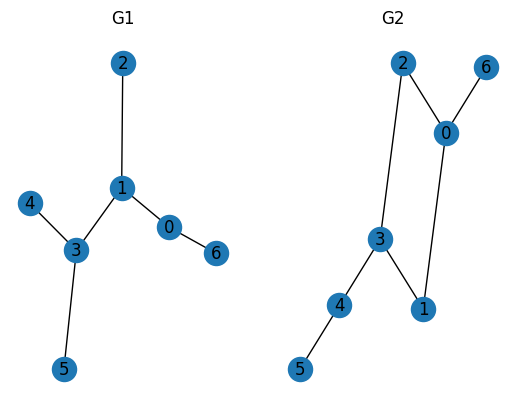

measures(G1) = [1.71, 3.71, 0.78, 0.0, 2.19, -0.45]
measures(G2) = [2.0, 4.57, 0.57, 0.0, 2.19, -0.46]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A1 = np.array([
#    0 1 2 3 4 5 6
    [0,1,0,0,0,0,1], # 0
    [1,0,1,1,0,0,0], # 1
    [0,1,0,0,0,0,0], # 2
    [0,1,0,0,1,1,0], # 3
    [0,0,0,1,0,0,0], # 4
    [0,0,0,1,0,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 
G1 = nx.from_numpy_array(np.array(A1), create_using=nx.Graph)  

A2 = np.array([
#    0 1 2 3 4 5 6
    [0,1,1,0,0,0,1], # 0
    [1,0,0,1,0,0,0], # 1
    [1,0,0,1,0,0,0], # 2
    [0,1,1,0,1,0,0], # 3
    [0,0,0,1,0,1,0], # 4
    [0,0,0,0,1,0,0], # 5
    [1,0,0,0,0,0,0]  # 6
    ]) 
G2 = nx.from_numpy_array(np.array(A2), create_using=nx.Graph)  

plt.subplot(1,2,1)
plt.title("G1")
nx.draw_kamada_kawai(G1,with_labels=True)
plt.subplot(1,2,2)
plt.title("G2")
nx.draw_kamada_kawai(G2,with_labels=True)
plt.show()

def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    return  k1, k2, variance, av_cl, l, r

results_G1 = measures(G1)
results_G2 = measures(G2)

print(f"measures(G1) = {[round(result, 2) for result in results_G1]}")
print(f"measures(G2) = {[round(result, 2) for result in results_G2]}")

cliques
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 2], [0, 4], [0, 9], [1, 2], [1, 3], [1, 5], [2, 3], [2, 4], [2, 7], [2, 8], [3, 4], [3, 5], [3, 7], [3, 8], [3, 9], [4, 8], [4, 9], [6, 7], [6, 9], [7, 8], [7, 9], [0, 1, 2], [0, 2, 4], [0, 4, 9], [1, 2, 3], [1, 3, 5], [2, 3, 4], [2, 3, 7], [2, 3, 8], [2, 4, 8], [2, 7, 8], [3, 4, 8], [3, 4, 9], [3, 7, 8], [3, 7, 9], [6, 7, 9], [2, 3, 4, 8], [2, 3, 7, 8]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 2], [0, 4], [0, 6], [0, 7], [0, 9], [1, 3], [1, 5], [1, 9], [2, 3], [2, 5], [2, 7], [2, 8], [3, 4], [3, 6], [7, 8], [0, 1, 9], [0, 2, 7], [2, 7, 8]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 6], [0, 7], [0, 9], [1, 3], [1, 7], [1, 8], [2, 4], [2, 7], [2, 8], [3, 7], [3, 9], [4, 5], [4, 7], [4, 9], [5, 9], [6, 7], [6, 8], [7, 9], [8, 9], [0, 1, 7], [0, 6, 7], [0, 7, 9], [1, 3, 7], [2, 4, 7], [3, 7, 9], [4, 5, 9], [4, 7, 9]]


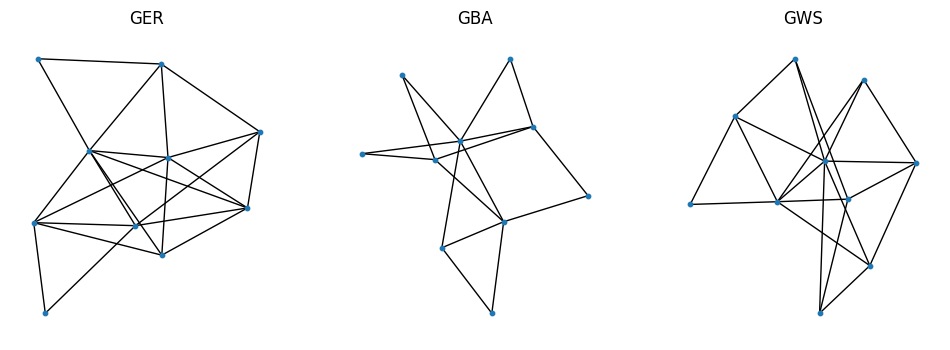

Betti numbers(GER) =  [1, 0, 0, 0]
Betti numbers(GBA) =  [1, 4, 0]
Betti numbers(GWS) =  [1, 3, 0]
measures(GER) = [4.4, 21.6, 2.24, 0.63, 1.56, -0.18]
measures(GBA) = [3.2, 12.2, 1.96, 0.32, 1.78, -0.44]
measures(GWS) = [4.0, 18.0, 2.0, 0.43, 1.6, -0.3]
cliques
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 9], [1, 3], [1, 4], [1, 7], [1, 9], [2, 5], [2, 6], [2, 7], [2, 9], [3, 6], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [5, 6], [5, 9], [6, 8], [6, 9], [8, 9], [0, 1, 3], [0, 1, 4], [0, 1, 7], [0, 1, 9], [0, 3, 6], [0, 4, 5], [0, 4, 6], [0, 4, 7], [0, 4, 9], [0, 5, 6], [0, 5, 9], [0, 6, 9], [1, 4, 7], [1, 4, 9], [2, 5, 6], [2, 5, 9], [2, 6, 9], [4, 5, 6], [4, 5, 9], [4, 6, 8], [4, 6, 9], [4, 8, 9], [5, 6, 9], [6, 8, 9], [0, 1, 4, 7], [0, 1, 4, 9], [0, 4, 5, 6], [0, 4, 5, 9], [0, 4, 6, 9], [0, 5, 6, 9], [2, 5, 6, 9], [4, 5, 6, 9], [4, 6, 8, 9], [0, 4, 5, 6, 9]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 2], [0, 

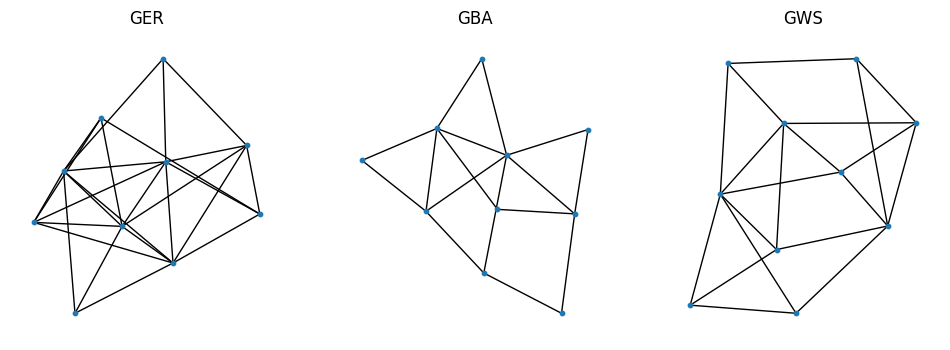

Betti numbers(GER) =  [1, 1, 0, 0, 0]
Betti numbers(GBA) =  [1, 2, 0]
Betti numbers(GWS) =  [1, 3, 0]
measures(GER) = [5.2, 29.6, 2.56, 0.63, 1.42, -0.26]
measures(GBA) = [3.2, 12.2, 1.96, 0.46, 1.78, -0.35]
measures(GWS) = [4.0, 17.0, 1.0, 0.39, 1.6, -0.29]
cliques
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 3], [0, 4], [0, 6], [0, 8], [1, 2], [1, 5], [1, 7], [2, 4], [2, 7], [2, 9], [3, 6], [3, 8], [4, 5], [4, 6], [4, 7], [4, 8], [5, 6], [6, 9], [7, 9], [0, 3, 6], [0, 3, 8], [0, 4, 6], [0, 4, 8], [1, 2, 7], [2, 4, 7], [2, 7, 9], [4, 5, 6]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 1], [0, 2], [0, 3], [0, 4], [0, 7], [0, 8], [0, 9], [1, 5], [2, 3], [2, 4], [2, 6], [2, 7], [2, 8], [3, 5], [3, 6], [3, 9], [0, 2, 3], [0, 2, 4], [0, 2, 7], [0, 2, 8], [0, 3, 9], [2, 3, 6]]
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [0, 2], [0, 5], [0, 6], [0, 7], [0, 9], [1, 2], [1, 3], [1, 7], [1, 9], [2, 3], [2, 5], [2, 8], [3, 5], [3, 7], [3, 8], [4, 5], [4, 6], [4, 8], [6

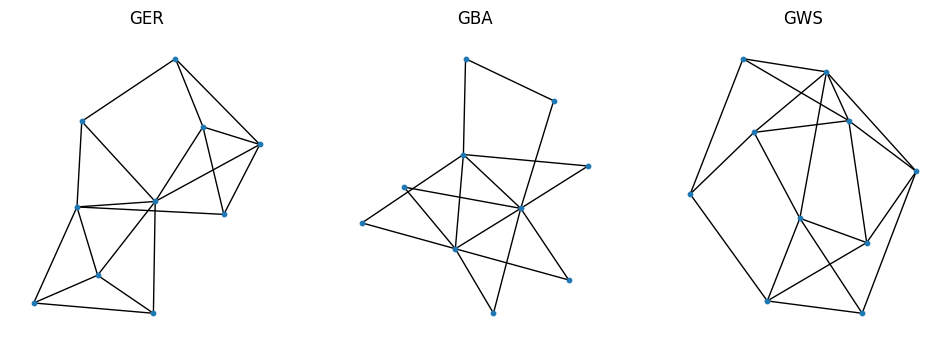

Betti numbers(GER) =  [1, 2, 0]
Betti numbers(GBA) =  [1, 1, 0]
Betti numbers(GWS) =  [1, 4, 0]
measures(GER) = [3.8, 15.4, 0.96, 0.46, 1.71, -0.14]
measures(GBA) = [3.2, 13.8, 3.56, 0.59, 1.73, -0.53]
measures(GWS) = [4.0, 16.6, 0.6, 0.31, 1.6, -0.04]


In [2]:
import networkx as nx
import gudhi

# Parâmetros dados
n_nodes = 10
av_degree = 5

# Parâmetros calculados
p = av_degree/(n_nodes-1)
m = int(av_degree/2)
k = int(av_degree)

def m_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    return G.subgraph(Gcc[0])


for i in range(0,3):
    # Erdos-Reni
    GER = nx.erdos_renyi_graph(n_nodes, p, seed=None, directed=False)
    # Barabasi-Albert
    GBA = nx.barabasi_albert_graph(n_nodes, m, seed=None)
    # Small-world
    GWS = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
    
    # Obter a lista de cliques para cada rede
    er_cliques = list(nx.enumerate_all_cliques(GER))
    ba_cliques = list(nx.enumerate_all_cliques(GBA))
    ws_cliques = list(nx.enumerate_all_cliques(GWS))
    
    #print("cliques")
    #print(er_cliques)
    #print(ba_cliques)
    #print(ws_cliques)

    # Criar o complexo simplicial a partir das listas de cliques
    er_complex = gudhi.SimplexTree()
    for clique in er_cliques:
        er_complex.insert(clique)

    ba_complex = gudhi.SimplexTree()
    for clique in ba_cliques:
        ba_complex.insert(clique)
    
    ws_complex = gudhi.SimplexTree()
    for clique in ws_cliques:
        ws_complex.insert(clique)

    # Calcular a homologia de cliques para cada complexo
    er_homology = er_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ba_homology = ba_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)
    ws_homology = ws_complex.persistence(homology_coeff_field=2, min_persistence=-1.0, persistence_dim_max=True)

    er_betti = er_complex.betti_numbers()
    ba_betti = ba_complex.betti_numbers()
    ws_betti = ws_complex.betti_numbers()

    plt.figure(figsize=(12, 4))

    plt.subplot(1,3,1)
    plt.title("GER")
    nx.draw_kamada_kawai(GER, with_labels=False, node_size=10)
    
    plt.subplot(1,3,2)
    plt.title("GBA")
    nx.draw_kamada_kawai(GBA, with_labels=False, node_size=10)
        
    plt.subplot(1,3,3)
    plt.title("GWS")
    nx.draw_kamada_kawai(GWS, with_labels=False, node_size=10)
    
    plt.show()

    print("Betti numbers(GER) = ", er_betti)
    print("Betti numbers(GBA) = ", ba_betti)
    print("Betti numbers(GWS) = ", ws_betti)
        
    GER = m_component(GER)
    GBA = m_component(GBA)
    GWS = m_component(GWS)

    er_measures = measures(GER)
    ba_measures = measures(GBA)
    ws_measures = measures(GWS)

    print(f"measures(GER) = {[round(result, 2) for result in er_measures]}")
    print(f"measures(GBA) = {[round(result, 2) for result in ba_measures]}")
    print(f"measures(GWS) = {[round(result, 2) for result in ws_measures]}")